<a href="https://colab.research.google.com/github/Megha2004/pythonBasics/blob/main/Return_of_Investment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv("/content/ROI dataset.csv")
df.head()

,CustomerID,Age,Gender,Location,CurrentIncome,Savings,EarningPotential,HistoricalSpending,CreditScore,SpendingLimit,EducationalStatus
0,1,28,Male,New York,350000,10000,175000,1200,720,1500,Bachelor
1,2,35,Female,Los Angeles,60000,15000,80000,1400,680,1800,Master
2,3,22,Male,Chicago,45000,8000,70000,1000,700,1200,High School
3,4,30,Female,Miami,55000,12000,178000,1100,710,1600,Bachelor
4,5,32,Male,San Francisco,265000,18000,182000,1300,700,1900,Master


In [77]:
import pandas as pd

def calculate_roi(row):
    net_profit = row['CurrentIncome'] + row['EarningPotential']
    return (net_profit / row['SpendingLimit']) * 100

df['ROI'] = df.apply(calculate_roi, axis=1)
print(df[['CurrentIncome', 'EarningPotential', 'SpendingLimit', 'ROI']])


     CurrentIncome  EarningPotential  SpendingLimit           ROI
0           350000            175000           1500  35000.000000
1            60000             80000           1800   7777.777778
2            45000             70000           1200   9583.333333
3            55000            178000           1600  14562.500000
4           265000            182000           1900  23526.315789
..             ...               ...            ...           ...
495         120000            150000           1300  20769.230769
496          90000            110000           1100  18181.818182
497         100000            120000           1200  18333.333333
498          70000             90000            800  20000.000000
499          80000            100000            900  20000.000000

[500 rows x 4 columns]


In [78]:
import pandas as pd

top_max_roi = df.nlargest(3, 'ROI')
print(top_max_roi)


     CustomerID  Age  Gender      Location  CurrentIncome  Savings  \
224         225   30  Female         Miami        1154000    12000   
493         494   26    Male  South Africa          60000     7000   
0             1   28    Male      New York         350000    10000   

     EarningPotential  HistoricalSpending  CreditScore  SpendingLimit  \
224             77000                1250          700           1700   
493            280000                 600          650            700   
0              175000                1200          720           1500   

    EducationalStatus           ROI  
224               PhD  72411.764706  
493          Bachelor  48571.428571  
0            Bachelor  35000.000000  


In [80]:
import pandas as pd

target_country = 'India'
country_df = df[df['Location'] == target_country]
top_max_roi_country = country_df.nlargest(1, 'ROI')
print(top_max_roi_country)


     CustomerID  Age  Gender Location  CurrentIncome  Savings  \
396         397   33  Female    India          80000    10000   

     EarningPotential  HistoricalSpending  CreditScore  SpendingLimit  \
396            100000                 800          700            900   

    EducationalStatus      ROI  
396            Master  20000.0  


In [81]:
import pandas as pd
top_customers = df.nlargest(3, 'ROI')[['CustomerID', 'Location','ROI']]
print(top_customers)


     CustomerID      Location           ROI
224         225         Miami  72411.764706
493         494  South Africa  48571.428571
0             1      New York  35000.000000


In [82]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = df[['Age', 'Savings', 'EarningPotential', 'HistoricalSpending', 'CreditScore']]
y = df['SpendingLimit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


Mean Squared Error (MSE): 1374.60
Root Mean Squared Error (RMSE): 37.08
R-squared (R²): 0.99


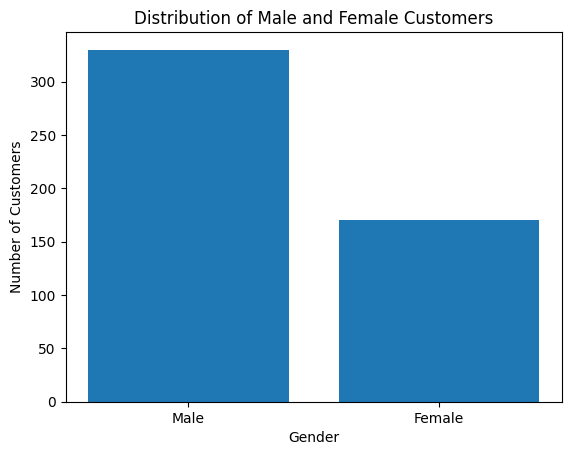

There is gender imbalance, with over 300 males and nearly 150 females.


In [83]:
import pandas as pd
import matplotlib.pyplot as plt

gender_counts = df['Gender'].value_counts()

plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.title('Distribution of Male and Female Customers')
plt.show()

print("There is gender imbalance, with over 300 males and nearly 150 females.")

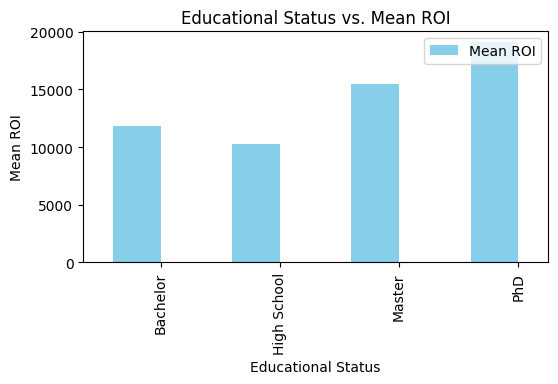

Phd holders contribute to higher ROI followed by Masters,Bachelor and High school students


In [84]:
import pandas as pd
import matplotlib.pyplot as plt

edu_roi = df.groupby('EducationalStatus')['ROI'].mean()

fig, ax = plt.subplots(figsize=(6, 3))
edu_roi.plot(kind='bar', color='skyblue', ax=ax, position=1, width=0.4, label='Mean ROI')
ax.set_ylabel('Mean ROI')
ax.set_xlabel('Educational Status')
ax.set_title('Educational Status vs. Mean ROI')

plt.xticks(range(len(edu_roi.index)), edu_roi.index)
plt.legend(loc='upper right')
plt.show()

print("Phd holders contribute to higher ROI followed by Masters,Bachelor and High school students")

In [ ]:
!pip install geopandas

<ipython-input-35-b9996eb36fcb>:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


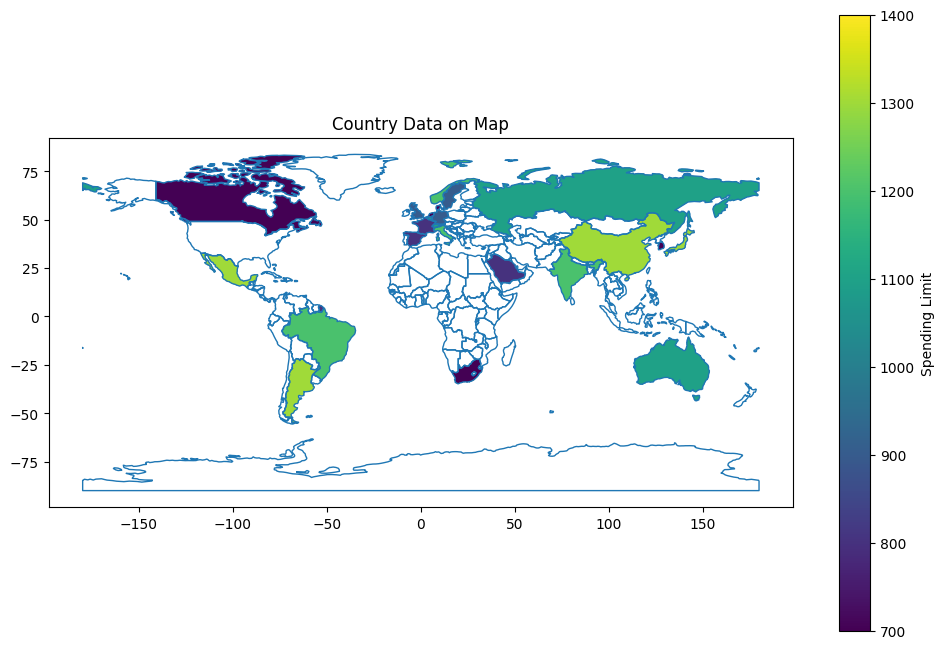

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
merged_data = world.merge(df, left_on='name', right_on='Location')
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.set_title('Country Data on Map')
world.boundary.plot(ax=ax, linewidth=1)
merged_data.plot(column='SpendingLimit', ax=ax, legend=True, legend_kwds={'label': "Spending Limit"})

plt.show()

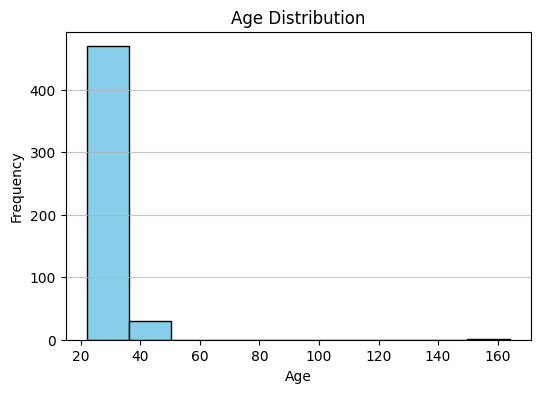

Citizens with age of 25-35 are high contributers.


In [85]:
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.hist(df['Age'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.grid(axis='y', alpha=0.75)

plt.show()
print("Citizens with age of 25-35 are high contributers.")

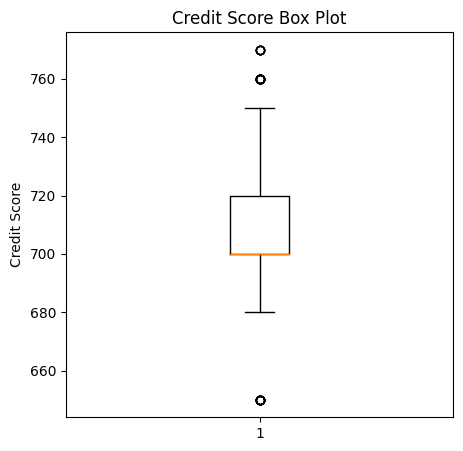

Credit score range from 700-720 and there 3 outliers of Credit score


In [86]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.boxplot(df['CreditScore'])
plt.title('Credit Score Box Plot')
plt.ylabel('Credit Score')
plt.show()

print("Credit score range from 700-720 and there 3 outliers of Credit score")


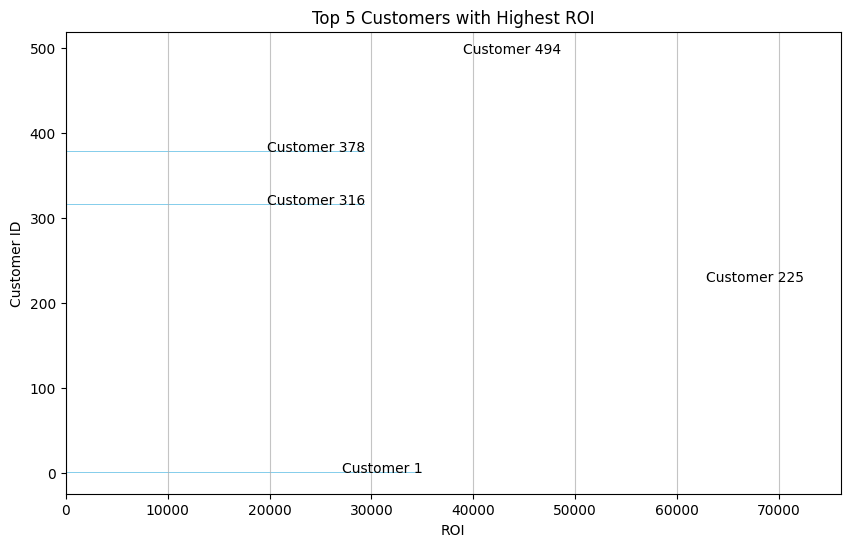

Customer 494 has highest ROI followed by Customer 378,Customer316,Customer225 and Customer1


In [87]:
import pandas as pd
import matplotlib.pyplot as plt

top_5_customers = df.sort_values(by='ROI', ascending=False).head(5)

plt.figure(figsize=(10, 6))
plt.barh(top_5_customers['CustomerID'], top_5_customers['ROI'], color='skyblue')
plt.xlabel('ROI')
plt.ylabel('Customer ID')
plt.title('Top 5 Customers with Highest ROI')

for index, row in top_5_customers.iterrows():
    plt.text(row['ROI'], row['CustomerID'], f'Customer {int(row["CustomerID"])}', ha='right')

plt.grid(axis='x', alpha=0.75)

plt.show()
print("Customer 494 has highest ROI followed by Customer 378,Customer316,Customer225 and Customer1")

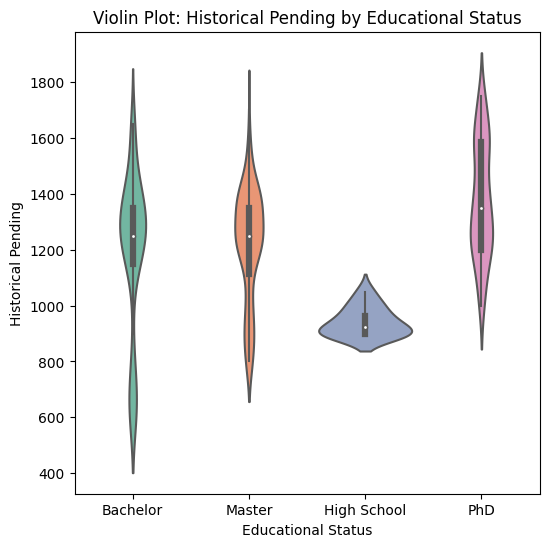

In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
sns.violinplot(data=df, x='EducationalStatus', y='HistoricalSpending', palette='Set2')
plt.xlabel('Educational Status')
plt.ylabel('Historical Pending')
plt.title('Violin Plot: Historical Pending by Educational Status')

plt.show()


<ipython-input-89-75e33aade82d>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


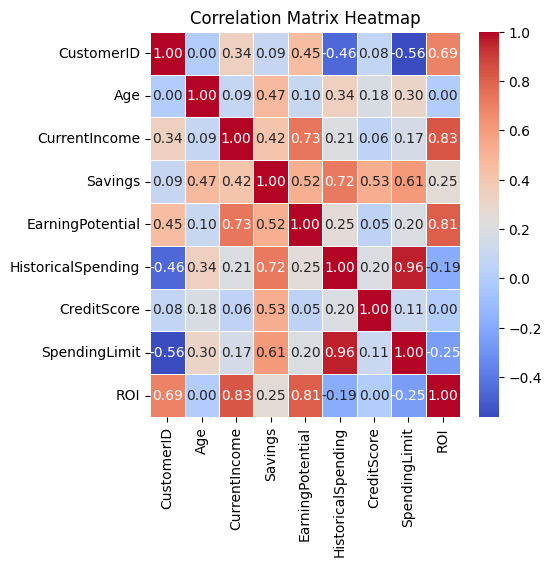

In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

plt.figure(figsize=(5,5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()
